# S-wave Transducer Testing - Oscilloscope # 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from myfft import myfft
from read_my_csv import read_my_csv
exec(open('ComputeDelays.py').read())

In [2]:
import peakutils
from peakutils import indexes, peak

def gaussian(x, amplitude, mean, stddev):
    y = amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y

def FWHM(x,y):
    
    fits = peakutils.peak.gaussian_fit(x, y, center_only=False)
    x_new = np.linspace(x[0],x[-1],100)
    gaus_y = gaussian(x_new,fits[0], fits[1], fits[2])
    
    # Find the indices of the peaks
    peak_indices = indexes(gaus_y, thres=0.5, min_dist=1)

    # Get the index of the highest peak
    max_index = peak_indices[np.argmax(gaus_y[peak_indices])]

    # Calculate the FWHM
    half_max = gaus_y[max_index] / 2.0
    left_index = np.argmin(np.abs(gaus_y[:max_index] - half_max))
    right_index = np.argmin(np.abs(gaus_y[max_index:] - half_max)) + max_index
    fwhm = x_new[right_index] - x_new[left_index]
    
    # Find central frequency from peak index:
    central_freq = x_new[max_index]

    print("Peak Index:", max_index)
    print("Central Frequency:", central_freq)
    print("FWHM:", fwhm)
    print("")
    return x_new,gaus_y, max_index, central_freq, fwhm

## Without Amp (1,4,continuous)

In [3]:
## 1 CYCLE

# S1 to S2
t_S12_2,vol_S12_2 = read_my_csv('TEK0001.csv')
t_S12_4,vol_S12_4 = read_my_csv('TEK0002.csv')
t_S12_6,vol_S12_6 = read_my_csv('TEK0003.csv')
t_S12_8,vol_S12_8 = read_my_csv('TEK0004.csv')
t_S12_10,vol_S12_10 = read_my_csv('TEK0005.csv')

# S2 to S1
t_S21_2,vol_S21_2 = read_my_csv('TEK0006.csv')
t_S21_4,vol_S21_4 = read_my_csv('TEK0007.csv')
t_S21_6,vol_S21_6 = read_my_csv('TEK0008.csv')
t_S21_8,vol_S21_8 = read_my_csv('TEK0009.csv')
t_S21_10,vol_S21_10 = read_my_csv('TEK0010.csv')

## 4 CYCLES

t4_2,vol4_2 = read_my_csv('TEK0011.csv')
t4_4,vol4_4 = read_my_csv('TEK0012.csv')
t4_6,vol4_6 = read_my_csv('TEK0013.csv')
t4_8,vol4_8 = read_my_csv('TEK0014.csv')
t4_10,vol4_10 = read_my_csv('TEK0015.csv')

## CONTINUOUS
tc_2,volc_2 = read_my_csv('TEK0016.csv')
tc_4,volc_4 = read_my_csv('TEK0017.csv')
tc_6,volc_6 = read_my_csv('TEK0018.csv')
tc_8,volc_8 = read_my_csv('TEK0019.csv')
tc_10,volc_10 = read_my_csv('TEK0020.csv')

In [4]:
f_S12_2,FT_S12_2=myfft(t_S12_2,vol_S12_2)
f_S12_4,FT_S12_4=myfft(t_S12_4,vol_S12_4)
f_S12_6,FT_S12_6=myfft(t_S12_6,vol_S12_6)
f_S12_8,FT_S12_8=myfft(t_S12_8,vol_S12_8)
f_S12_10,FT_S12_10=myfft(t_S12_10,vol_S12_10)

f4_2,FT4_2=myfft(t4_2,vol4_2)
f4_4,FT4_4=myfft(t4_4,vol4_4)
f4_6,FT4_6=myfft(t4_6,vol4_6)
f4_8,FT4_8=myfft(t4_8,vol4_8)
f4_10,FT4_10=myfft(t4_10,vol4_10)

fc_2,FTc_2=myfft(tc_2,volc_2)
fc_4,FTc_4=myfft(tc_4,volc_4)
fc_6,FTc_6=myfft(tc_6,volc_6)
fc_8,FTc_8=myfft(tc_8,volc_8)
fc_10,FTc_10=myfft(tc_10,volc_10)

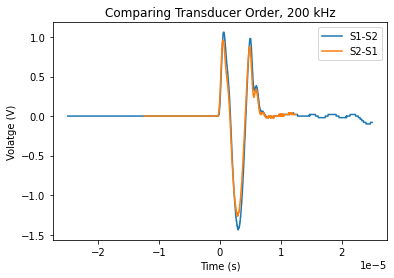

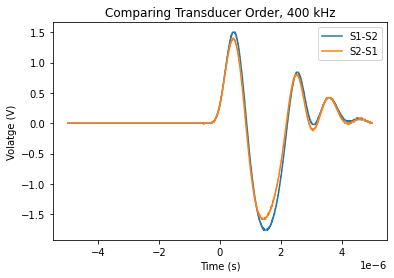

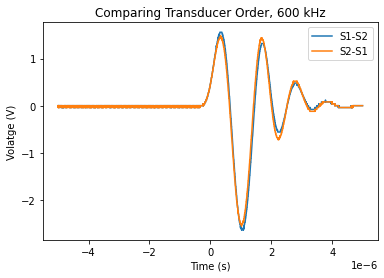

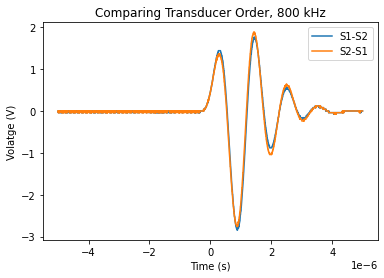

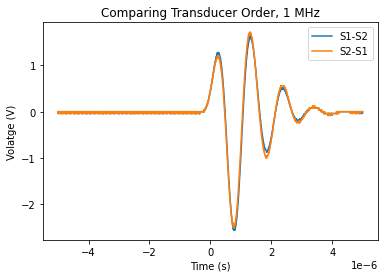

In [5]:
plt.plot(t_S12_2,vol_S12_2, label="S1-S2")
plt.plot(t_S21_2,vol_S21_2, label="S2-S1")
plt.title('Comparing Transducer Order, 200 kHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')
plt.savefig('Compare_STrans_Order_200khz.jpeg',dpi=300)

plt.figure()
plt.plot(t_S12_4,vol_S12_4, label="S1-S2")
plt.plot(t_S21_4,vol_S21_4, label="S2-S1")
plt.title('Comparing Transducer Order, 400 kHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')
plt.savefig('Compare_STrans_Order_400khz.jpeg',dpi=300)

plt.figure()
plt.plot(t_S12_6,vol_S12_6, label="S1-S2")
plt.plot(t_S21_6,vol_S21_6, label="S2-S1")
plt.title('Comparing Transducer Order, 600 kHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')
plt.savefig('Compare_STrans_Order_600khz.jpeg',dpi=300)

plt.figure()
plt.plot(t_S12_8,vol_S12_8, label="S1-S2")
plt.plot(t_S21_8,vol_S21_8, label="S2-S1")
plt.title('Comparing Transducer Order, 800 kHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')
plt.savefig('Compare_STrans_Order_800khz.jpeg',dpi=300)

plt.figure()
plt.plot(t_S12_10,vol_S12_10, label="S1-S2")
plt.plot(t_S21_10,vol_S21_10, label="S2-S1")
plt.title('Comparing Transducer Order, 1 MHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')
plt.savefig('Compare_STrans_Order_1Mhz.jpeg',dpi=300)

    

The figures above show that the order of the transducers (ie which one is transimitting and which one is receiving) has little to no significant affect on the signal. Therefore, from here on, just one orientation will be used to conserve time.

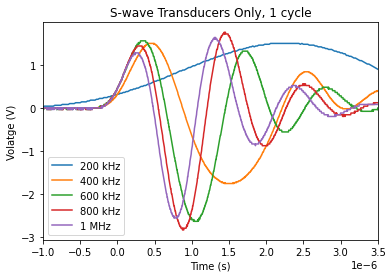

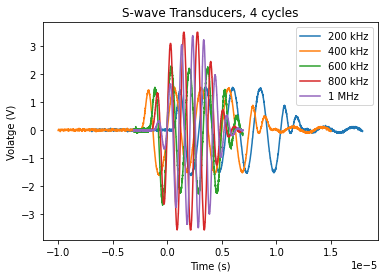

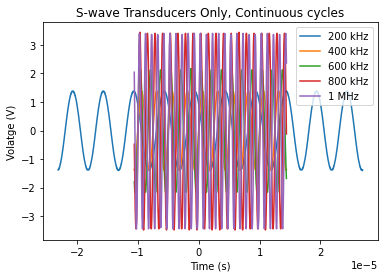

In [5]:
plt.plot(t_S12_2[1100:2000],vol_S12_4[1100:2000], label="200 kHz")
plt.plot(t_S12_4[1000:],vol_S12_4[1000:], label="400 kHz")
plt.plot(t_S12_6[1000:],vol_S12_6[1000:], label="600 kHz")
plt.plot(t_S12_8[1000:],vol_S12_8[1000:], label="800 kHz")
plt.plot(t_S12_10[1000:],vol_S12_10[1000:], label="1 MHz")
plt.title('S-wave Transducers Only, 1 cycle')
plt.legend()
plt.xlim([-1e-6,0.35e-5])
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')
plt.savefig('Figures/S-trans_1cyc.jpeg',dpi=300)

plt.figure()
plt.plot(t4_2,vol4_4, label="200 kHz")
plt.plot(t4_4,vol4_4, label="400 kHz")
plt.plot(t4_6,vol4_6, label="600 kHz")
plt.plot(t4_8,vol4_8, label="800 kHz")
plt.plot(t4_10,vol4_10, label="1 MHz")
plt.title('S-wave Transducers, 4 cycles')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')
plt.savefig('Figures/S-trans_4cyc.jpeg',dpi=300)

plt.figure()
plt.plot(tc_2,volc_4, label="200 kHz")
plt.plot(tc_4,volc_4, label="400 kHz")
plt.plot(tc_6,volc_6, label="600 kHz")
plt.plot(tc_8,volc_8, label="800 kHz")
plt.plot(tc_10,volc_10, label="1 MHz")
plt.title('S-wave Transducers Only, Continuous cycles')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')
plt.savefig('S-trans_Contcyc.jpeg',dpi=300)

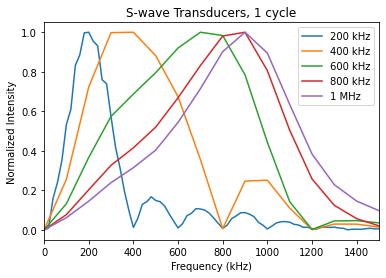

In [12]:

f_S12_2,FT_S12_2=myfft(t_S12_2,vol_S12_2)
f_S12_4,FT_S12_4=myfft(t_S12_4,vol_S12_4)
f_S12_6,FT_S12_6=myfft(t_S12_6,vol_S12_6)
f_S12_8,FT_S12_8=myfft(t_S12_8,vol_S12_8)
f_S12_10,FT_S12_10=myfft(t_S12_10,vol_S12_10)

plt.plot(f_S12_2,np.abs(FT_S12_2)/max(np.abs(FT_S12_2)), label = '200 kHz')
plt.plot(f_S12_4,np.abs(FT_S12_4)/max(np.abs(FT_S12_4)), label = '400 kHz')
plt.plot(f_S12_6,np.abs(FT_S12_6)/max(np.abs(FT_S12_6)), label = '600 kHz')
plt.plot(f_S12_8,np.abs(FT_S12_8)/max(np.abs(FT_S12_8)), label = '800 kHz')
plt.plot(f_S12_10,np.abs(FT_S12_10)/max(np.abs(FT_S12_10)), label = '1 MHz')
plt.xlim([0,1500])
plt.title('S-wave Transducers, 1 cycle')
plt.xlabel("Frequency (kHz)")
plt.ylabel("Normalized Intensity")
plt.legend()
plt.savefig("Figures/S-trans_1cyc_FFT.",dpi=300)

In [8]:
# Frequency at peak (Hz):
print(f_S12_2[np.argmax(np.abs(FT_S12_2))])
print(f_S12_4[np.argmax(np.abs(FT_S12_4))])
print(f_S12_6[np.argmax(np.abs(FT_S12_6))])
print(f_S12_8[np.argmax(np.abs(FT_S12_8))])
print(f_S12_10[np.argmax(np.abs(FT_S12_10))])

-200.0800320127732
-400.1600640256649
700.2801120449136
-900.360144057746
-900.360144057746


In [14]:
# df
print(f_S12_2[2]-f_S12_2[1])
print(f_S12_4[2]-f_S12_4[1])
print(f_S12_6[2]-f_S12_6[1])
print(f_S12_8[2]-f_S12_8[1])
print(f_S12_10[2]-f_S12_10[1])

20.00800320127746
100.04001600641641
100.04001600641641
100.04001600641641
100.04001600641641


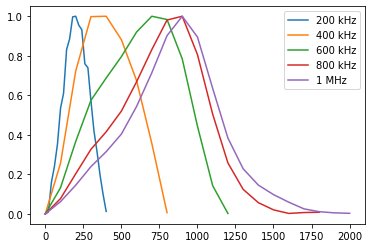

In [24]:
plt.plot(f_S12_2[1249:1270],np.abs(FT_S12_2[1249:1270])/max(np.abs(FT_S12_2[1249:1270])), label = '200 kHz')
plt.plot(f_S12_4[1249:1258],np.abs(FT_S12_4[1249:1258])/max(np.abs(FT_S12_4[1249:1258])), label = '400 kHz')
plt.plot(f_S12_6[1249:1262],np.abs(FT_S12_6[1249:1262])/max(np.abs(FT_S12_6[1249:1262])), label = '600 kHz')
plt.plot(f_S12_8[1249:1268],np.abs(FT_S12_8[1249:1268])/max(np.abs(FT_S12_8[1249:1268])), label = '800 kHz')
plt.plot(f_S12_10[1249:1270],np.abs(FT_S12_10[1249:1270])/max(np.abs(FT_S12_10[1249:1270])), label = '1 MHz')
plt.legend()

In [22]:
len(f_S12_2)/2

1249.5

In [25]:
print('200kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_S12_2[1249:1270],np.abs(FT_S12_2[1249:1270])/max(np.abs(FT_S12_2[1249:1270])))
print('400kHz')
x2,gaus2,index2, central2, fwhm2 = FWHM(f_S12_4[1249:1258],np.abs(FT_S12_4[1249:1258])/max(np.abs(FT_S12_4[1249:1258])))
print('600kHz')
x3,gaus3,index3, central3, fwhm3 = FWHM(f_S12_6[1249:1262],np.abs(FT_S12_6[1249:1262])/max(np.abs(FT_S12_6[1249:1262])))
print('800 kHz')
x4,gaus4,index4, central4, fwhm4 = FWHM(f_S12_8[1249:1268],np.abs(FT_S12_8[1249:1268])/max(np.abs(FT_S12_8[1249:1268])))
print('1000 kHz')
x5,gaus5,index5, central5, fwhm5 = FWHM(f_S12_10[1249:1270],np.abs(FT_S12_10[1249:1270])/max(np.abs(FT_S12_10[1249:1270])))

200kHz
Peak Index: 50
Central Frequency: 202.10104243714463
FWHM: 198.05902158840178

400kHz
Peak Index: 49
Central Frequency: 396.1180431769208
FWHM: 452.70633505933813

600kHz
Peak Index: 53
Central Frequency: 642.6813149503104
FWHM: 654.8073774965426

800 kHz
Peak Index: 44
Central Frequency: 800.3201280513298
FWHM: 672.996471315891

1000 kHz
Peak Index: 42
Central Frequency: 848.824378236259
FWHM: 666.9334400427749



Text(0, 0.5, 'Volatge (V)')

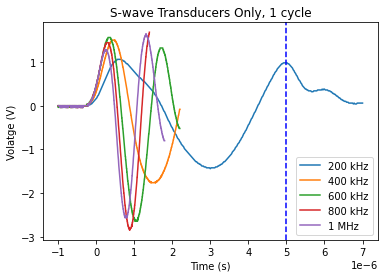

In [7]:
plt.plot(t_S12_2[1200:1600],vol_S12_2[1200: 1600], label="200 kHz")
plt.plot(t_S12_4[1000:1800],vol_S12_4[1000:1800], label="400 kHz")
plt.plot(t_S12_6[1000:1800],vol_S12_6[1000:1800], label="600 kHz")
#plt.plot(t_S12_6[1000:],vol_S12_6[1000:], label="600 kHz")
plt.plot(t_S12_8[1000:1600],vol_S12_8[1000:1600], label="800 kHz")
#plt.plot(t_S12_8[1000:],vol_S12_8[1000:], label="800 kHz")
plt.plot(t_S12_10[1000:1700],vol_S12_10[1000:1700], label="1 MHz")
plt.axvline(x = 5e-6, color = 'b', linestyle = 'dashed', label = '')
plt.title('S-wave Transducers Only, 1 cycle')
plt.legend()
#plt.xlim([-1e-6,5e-6])
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')


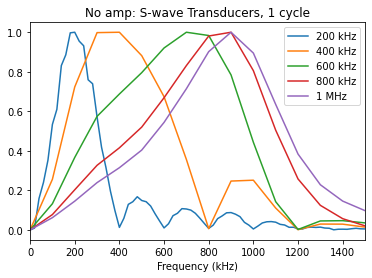

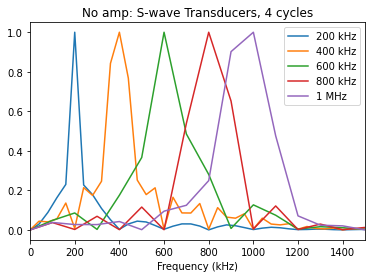

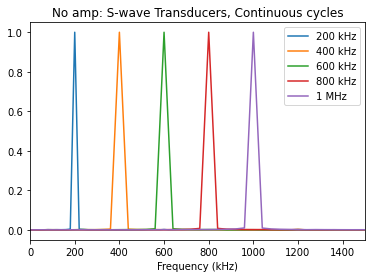

In [15]:
plt.plot(f_S12_2,np.abs(FT_S12_2)/max(np.abs(FT_S12_2)), label = '200 kHz')
plt.plot(f_S12_4,np.abs(FT_S12_4)/max(np.abs(FT_S12_4)), label = '400 kHz')
plt.plot(f_S12_6,np.abs(FT_S12_6)/max(np.abs(FT_S12_6)), label = '600 kHz')
plt.plot(f_S12_8,np.abs(FT_S12_8)/max(np.abs(FT_S12_8)), label = '800 kHz')
plt.plot(f_S12_10,np.abs(FT_S12_10)/max(np.abs(FT_S12_10)), label = '1 MHz')
plt.xlim([0,1500])
plt.title('No amp: S-wave Transducers, 1 cycle')
plt.xlabel("Frequency (kHz)")
plt.legend()
plt.savefig("S-trans_1cyc_FFT.",dpi=300)

plt.figure()
plt.plot(f4_2,np.abs(FT4_2)/max(np.abs(FT4_2)), label = '200 kHz')
plt.plot(f4_4,np.abs(FT4_4)/max(np.abs(FT4_4)), label = '400 kHz')
plt.plot(f4_6,np.abs(FT4_6)/max(np.abs(FT4_6)), label = '600 kHz')
plt.plot(f4_8,np.abs(FT4_8)/max(np.abs(FT4_8)), label = '800 kHz')
plt.plot(f4_10,np.abs(FT4_10)/max(np.abs(FT4_10)), label = '1 MHz')
plt.xlim([0,1500])
plt.title('No amp: S-wave Transducers, 4 cycles')
plt.xlabel("Frequency (kHz)")
plt.legend()

plt.figure()
plt.plot(fc_2,np.abs(FTc_2)/max(np.abs(FTc_2)), label = '200 kHz')
plt.plot(fc_4,np.abs(FTc_4)/max(np.abs(FTc_4)), label = '400 kHz')
plt.plot(fc_6,np.abs(FTc_6)/max(np.abs(FTc_6)), label = '600 kHz')
plt.plot(fc_8,np.abs(FTc_8)/max(np.abs(FTc_8)), label = '800 kHz')
plt.plot(fc_10,np.abs(FTc_10)/max(np.abs(FTc_10)), label = '1 MHz')
plt.xlim([0,1500])
plt.title('No amp: S-wave Transducers, Continuous cycles')
plt.xlabel("Frequency (kHz)")
plt.legend()

# WITH Amplifier 

In [16]:
## 1 CYCLE

tA_2,volA_2 = read_my_csv('TEK0035.csv')
tA_4,volA_4 = read_my_csv('TEK0034.csv')
tA_6,volA_6 = read_my_csv('TEK0033.csv')
tA_8,volA_8 = read_my_csv('TEK0032.csv')
tA_10,volA_10 = read_my_csv('TEK0031.csv')

## 4 CYCLES

t4A_2,vol4A_2 = read_my_csv('TEK0026.csv')
t4A_4,vol4A_4 = read_my_csv('TEK0027.csv')
t4A_6,vol4A_6 = read_my_csv('TEK0028.csv')
t4A_8,vol4A_8 = read_my_csv('TEK0029.csv')
t4A_10,vol4A_10 = read_my_csv('TEK0030.csv')

## CONTINUOUS
tcA_2,volcA_2 = read_my_csv('TEK0025.csv')
tcA_4,volcA_4 = read_my_csv('TEK0024.csv')
tcA_6,volcA_6 = read_my_csv('TEK0023.csv')
tcA_8,volcA_8 = read_my_csv('TEK0022.csv')
tcA_10,volcA_10 = read_my_csv('TEK0021.csv')

In [17]:
fA_2,FTA_2=myfft(tA_2,volA_2)
fA_4,FTA_4=myfft(tA_4,volA_4)
fA_6,FTA_6=myfft(tA_6,volA_6)
fA_8,FTA_8=myfft(tA_8,volA_8)
fA_10,FTA_10=myfft(tA_10,volA_10)

f4A_2,FT4A_2=myfft(t4A_2,vol4A_2)
f4A_4,FT4A_4=myfft(t4A_4,vol4A_4)
f4A_6,FT4A_6=myfft(t4A_6,vol4A_6)
f4A_8,FT4A_8=myfft(t4A_8,vol4A_8)
f4A_10,FT4A_10=myfft(t4A_10,vol4A_10)

fcA_2,FTcA_2=myfft(tcA_2,volcA_2)
fcA_4,FTcA_4=myfft(tcA_4,volcA_4)
fcA_6,FTcA_6=myfft(tcA_6,volcA_6)
fcA_8,FTcA_8=myfft(tcA_8,volcA_8)
fcA_10,FTcA_10=myfft(tcA_10,volcA_10)

Text(0, 0.5, 'Volatge (V)')

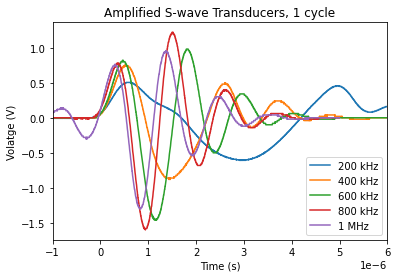

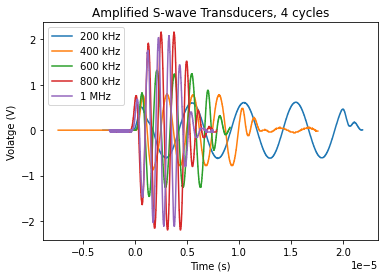

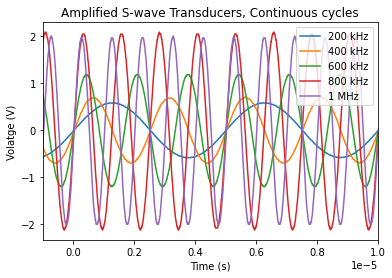

In [18]:
plt.plot(tA_2,volA_2, label="200 kHz")
plt.plot(tA_4 +2.3e-6,volA_4, label="400 kHz")
plt.plot(tA_6 +1.55e-6,volA_6, label="600 kHz")
plt.plot(tA_8,volA_8, label="800 kHz")
plt.plot(tA_10,volA_10, label="1 MHz")
plt.title('Amplified S-wave Transducers, 1 cycle')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')
plt.xlim([-1e-6,6e-6])
plt.savefig('Figures\S-tran_1cycle.jpeg', dpi=300)

plt.figure()
plt.plot(t4A_2 ,vol4A_2, label="200 kHz")
plt.plot(t4A_4 +2.5e-6,vol4A_4, label="400 kHz")
plt.plot(t4A_6 +1.75e-6,vol4A_6, label="600 kHz")
plt.plot(t4A_8 +1e-6,vol4A_8, label="800 kHz")
plt.plot(t4A_10+1e-6,vol4A_10, label="1 MHz")
plt.title('Amplified S-wave Transducers, 4 cycles')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')

plt.figure()
plt.plot(tcA_2 ,volcA_2, label="200 kHz")
plt.plot(tcA_4,volcA_4, label="400 kHz")
plt.plot(tcA_6,volcA_6, label="600 kHz")
plt.plot(tcA_8,volcA_8, label="800 kHz")
plt.plot(tcA_10,volcA_10, label="1 MHz")
plt.title('Amplified S-wave Transducers, Continuous cycles')
plt.legend()
plt.xlabel('Time (s)')
plt.xlim([-1e-6,1e-5])
plt.ylabel('Volatge (V)')

Text(0.5, 0, 'Frequency (kHz)')

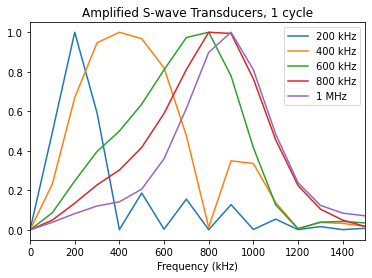

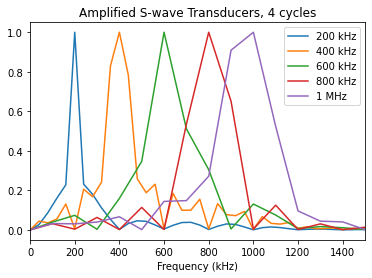

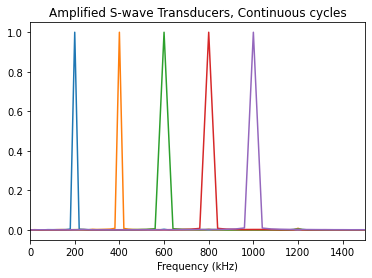

In [19]:
plt.plot(fA_2,np.abs(FTA_2)/max(np.abs(FTA_2)), label = '200 kHz')
plt.plot(fA_4,np.abs(FTA_4)/max(np.abs(FTA_4)), label = '400 kHz')
plt.plot(fA_6,np.abs(FTA_6)/max(np.abs(FTA_6)), label = '600 kHz')
plt.plot(fA_8,np.abs(FTA_8)/max(np.abs(FTA_8)), label = '800 kHz')
plt.plot(fA_10,np.abs(FTA_10)/max(np.abs(FTA_10)), label = '1 MHz')
plt.xlim([0,1500])
plt.title('Amplified S-wave Transducers, 1 cycle')
plt.xlabel("Frequency (kHz)")
plt.legend()
plt.savefig('Figures\S-tran_1cycleFFFT.jpeg', dpi=300)

plt.figure()
plt.plot(f4A_2,np.abs(FT4A_2)/max(np.abs(FT4A_2)), label = '200 kHz')
plt.plot(f4A_4,np.abs(FT4A_4)/max(np.abs(FT4A_4)), label = '400 kHz')
plt.plot(f4A_6,np.abs(FT4A_6)/max(np.abs(FT4A_6)), label = '600 kHz')
plt.plot(f4A_8,np.abs(FT4A_8)/max(np.abs(FT4A_8)), label = '800 kHz')
plt.plot(f4A_10,np.abs(FT4A_10)/max(np.abs(FT4A_10)), label = '1 MHz')
plt.xlim([0,1500])
plt.title('Amplified S-wave Transducers, 4 cycles')
plt.xlabel("Frequency (kHz)")
plt.legend()

plt.figure()
plt.plot(fcA_2,np.abs(FTcA_2)/max(np.abs(FTcA_2)), label = '200 kHz')
plt.plot(fcA_4,np.abs(FTcA_4)/max(np.abs(FTcA_4)), label = '400 kHz')
plt.plot(fcA_6,np.abs(FTcA_6)/max(np.abs(FTcA_6)), label = '600 kHz')
plt.plot(fcA_8,np.abs(FTcA_8)/max(np.abs(FTcA_8)), label = '800 kHz')
plt.plot(fcA_10,np.abs(FTcA_10)/max(np.abs(FTcA_10)), label = '1 MHz')
plt.xlim([0,1500])
plt.title('Amplified S-wave Transducers, Continuous cycles')
plt.xlabel("Frequency (kHz)")

## Compare amp to no amp signals

Text(0, 0.5, 'Volatge (V)')

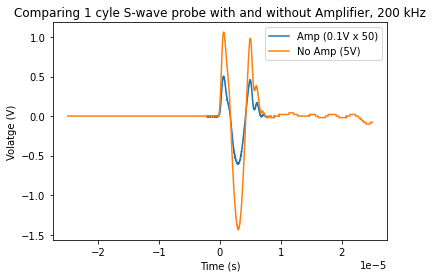

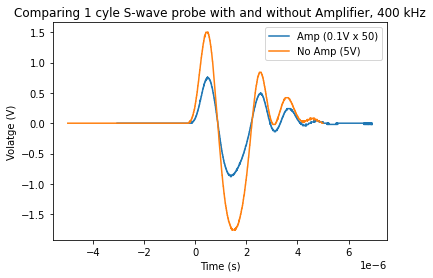

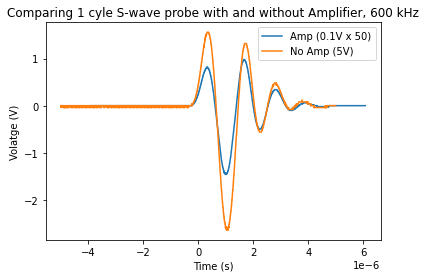

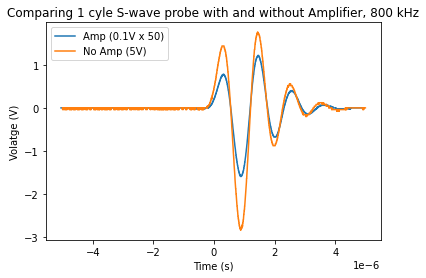

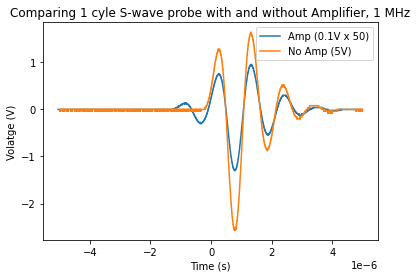

In [20]:
plt.figure()
plt.plot(tA_2 ,volA_2, label="Amp (0.1V x 50)")
plt.plot(t_S12_2,vol_S12_2, label="No Amp (5V)")
plt.title('Comparing 1 cyle S-wave probe with and without Amplifier, 200 kHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')

plt.figure()
plt.plot(tA_4 +2.25e-6 ,volA_4, label="Amp (0.1V x 50)")
plt.plot(t_S12_4,vol_S12_4, label="No Amp (5V)")
plt.title('Comparing 1 cyle S-wave probe with and without Amplifier, 400 kHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')

plt.figure()
plt.plot(tA_6 +1.4e-6,volA_6, label="Amp (0.1V x 50)")
plt.plot(t_S12_6,vol_S12_6, label="No Amp (5V)")
plt.title('Comparing 1 cyle S-wave probe with and without Amplifier, 600 kHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')

plt.figure()
plt.plot(tA_8 -0.05e-6 ,volA_8, label="Amp (0.1V x 50)")
plt.plot(t_S12_8,vol_S12_8, label="No Amp (5V)")
plt.title('Comparing 1 cyle S-wave probe with and without Amplifier, 800 kHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')

plt.figure()
plt.plot(tA_10 -0.05e-6 ,volA_10, label="Amp (0.1V x 50)")
plt.plot(t_S12_10,vol_S12_10, label="No Amp (5V)")
plt.title('Comparing 1 cyle S-wave probe with and without Amplifier, 1 MHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')



Text(0, 0.5, 'Volatge (V)')

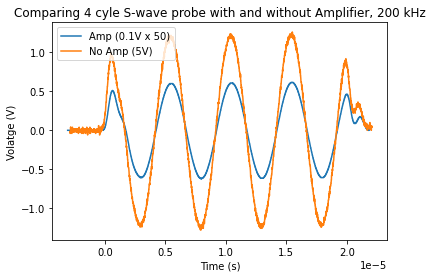

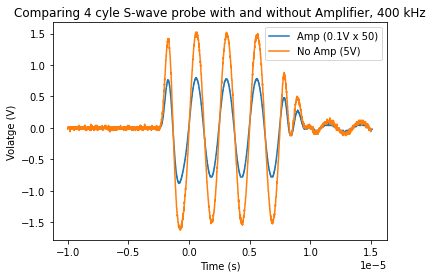

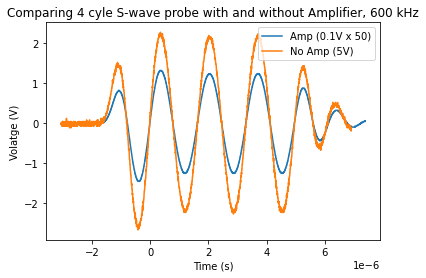

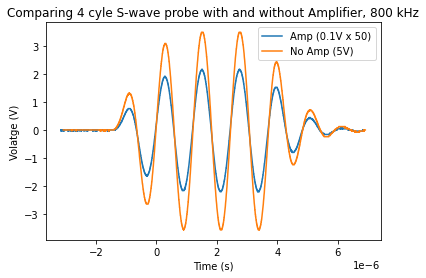

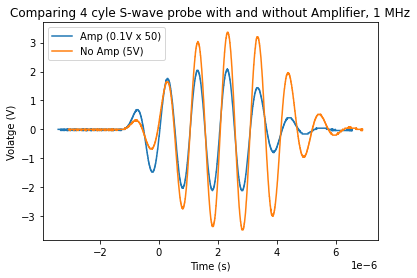

In [21]:
plt.figure()
plt.plot(t4A_2 ,vol4A_2, label="Amp (0.1V x 50)")
plt.plot(t4_2 +0.42e-5,vol4_2, label="No Amp (5V)")
plt.title('Comparing 4 cyle S-wave probe with and without Amplifier, 200 kHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')

plt.figure()
plt.plot(t4A_4 ,vol4A_4, label="Amp (0.1V x 50)")
plt.plot(t4_4,vol4_4, label="No Amp (5V)")
plt.title('Comparing 4 cyle S-wave probe with and without Amplifier, 400 kHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')

plt.figure()
plt.plot(t4A_6,vol4A_6, label="Amp (0.1V x 50)")
plt.plot(t4_6,vol4_6, label="No Amp (5V)")
plt.title('Comparing 4 cyle S-wave probe with and without Amplifier, 600 kHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')

plt.figure()
plt.plot(t4A_8,vol4A_8, label="Amp (0.1V x 50)")
plt.plot(t4_8,vol4_8, label="No Amp (5V)")
plt.title('Comparing 4 cyle S-wave probe with and without Amplifier, 800 kHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')

plt.figure()
plt.plot(t4A_10 + 0.5e-7,vol4A_10, label="Amp (0.1V x 50)")
plt.plot(t4_10,vol4_10, label="No Amp (5V)")
plt.title('Comparing 4 cyle S-wave probe with and without Amplifier, 1 MHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')

In [ ]:
plt.plot(fA_2,np.abs(FTA_2)/max(np.abs(FTA_2)), label = '200 kHz')
#plt.plot(fA_4,np.abs(FTA_4)/max(np.abs(FTA_4)), label = '400 kHz')
plt.plot(fA_6,np.abs(FTA_6)/max(np.abs(FTA_6)), label = '600 kHz')
#plt.plot(fA_8,np.abs(FTA_8)/max(np.abs(FTA_8)), label = '800 kHz')
plt.plot(fA_10,np.abs(FTA_10)/max(np.abs(FTA_10)), label = '1 MHz')

plt.plot(f_S12_2,np.abs(FT_S12_2)/max(np.abs(FT_S12_2)), label = 'Amp 200 kHz')
#plt.plot(f_S12_4,np.abs(FT_S12_4)/max(np.abs(FT_S12_4)), label = 'Amp 400 kHz')
plt.plot(f_S12_6,np.abs(FT_S12_6)/max(np.abs(FT_S12_6)), label = 'Amp 600 kHz')
#plt.plot(f_S12_8,np.abs(FT_S12_8)/max(np.abs(FT_S12_8)), label = 'Amp 800 kHz')
plt.plot(f_S12_10,np.abs(FT_S12_10)/max(np.abs(FT_S12_10)), label = 'Amp 1 MHz')
plt.xlim([0,1500])
plt.title('Comparing S-wave probe with and without Amplifier, 1 cycle')
plt.xlabel("Frequency (kHz)")
plt.legend()


# Compare 1 cycle to 4 cycles and Cont

In [ ]:
plt.figure()
plt.plot(tc_6,volc_6/max(volc_6), label="Cont")
plt.plot(t4_6+0.05e-6,vol4_6/max(vol4_6), label="4 cycles")
plt.plot(t_S12_6+3.6e-6,vol_S12_6/max(vol_S12_6), label="1 cycle")
plt.title('Comparing cyles, S-wave probe with and without Amplifier, 600 kHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')
plt.xlim([-0.5e-5,1e-5])


plt.figure()
plt.plot(tc_8,volc_8/max(volc_8), label="Cont")
plt.plot(t4_8+0.05e-6,vol4_8/max(vol4_8), label="4 cycles")
plt.plot(t_S12_8-1.1e-6,vol_S12_8/max(vol_S12_8), label="1 cycle")
plt.title('Comparing cyles, S-wave probe with and without Amplifier, 800 kHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')
plt.xlim([-0.3e-5,0.8e-5])

plt.figure()
plt.plot(tc_10,volc_10/max(volc_10), label="Cont")
plt.plot(t4_10-0.05e-6,vol4_10/max(vol4_10), label="4 cycles")
plt.plot(t_S12_10,vol_S12_10/max(vol_S12_10), label="1 cycle")
plt.title('Comparing cyles, S-wave probe with and without Amplifier, 1 MHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')
plt.xlim([-0.3e-5,0.8e-5])

In [ ]:
plt.figure()
plt.plot(tc_6,volc_6/max(volc_6), label="Cont")
plt.plot(t4_6+0.05e-6,vol4_6/max(vol4_6), label="4 cycles")
plt.plot(t_S12_6+3.6e-6,vol_S12_6/max(vol_S12_6), label="1 cycle")
plt.title('Comparing cyles, S-wave probe with and without Amplifier, 600 kHz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')
plt.xlim([-0.2e-5,0.9e-5])

In [ ]:
plt.figure()
plt.plot(tc_6,volc_6/max(volc_6), label="Cont")
plt.plot(t4_6+0.05e-6,vol4_6/max(vol4_6), label="4 cycles")
plt.plot(t_S12_6-1.38e-6,vol_S12_6/max(vol_S12_6), label="1 cycle")
plt.title('Comparing cyles, S-wave probe with and without Amplifier, 600 kHz - start lined up')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Volatge (V)')
plt.xlim([-0.3e-5,5e-6])